# BigQuery

In [1]:
from google.cloud import bigquery
import os

### Setting up the Google credentials here:

In [57]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="bqexercise.json"

In [3]:
client = bigquery.Client()

### Calling the API

In [4]:
# Constructing a reference to the 'hacker news' dataset

df_ref = client.dataset('hacker_news', project = 'bigquery-public-data')

In [5]:
# Building API request

df_hn = client.get_dataset(df_ref)

In [10]:
# List tables in 'hacker news' dataset

tables = list(client.list_tables(df_hn))
list_of_tables = [table.table_id for table in tables] 

# Print names of all tables in dataset:
for table in tables:
    print(table.table_id)

comments
full
full_201510
stories


In [12]:
# Building reference to the full table: 
table_ref = df_ref.table('full')

# API request: fetch the table.
table = client.get_table(table_ref)

### Taking a look at the table schema

In [13]:
table.schema

[SchemaField('title', 'STRING', 'NULLABLE', 'Story title', (), ()),
 SchemaField('url', 'STRING', 'NULLABLE', 'Story url', (), ()),
 SchemaField('text', 'STRING', 'NULLABLE', 'Story or comment text', (), ()),
 SchemaField('dead', 'BOOLEAN', 'NULLABLE', 'Is dead?', (), ()),
 SchemaField('by', 'STRING', 'NULLABLE', "The username of the item's author.", (), ()),
 SchemaField('score', 'INTEGER', 'NULLABLE', 'Story score', (), ()),
 SchemaField('time', 'INTEGER', 'NULLABLE', 'Unix time', (), ()),
 SchemaField('timestamp', 'TIMESTAMP', 'NULLABLE', 'Timestamp for the unix time', (), ()),
 SchemaField('type', 'STRING', 'NULLABLE', 'Type of details (comment, comment_ranking, poll, story, job, pollopt)', (), ()),
 SchemaField('id', 'INTEGER', 'NULLABLE', "The item's unique id.", (), ()),
 SchemaField('parent', 'INTEGER', 'NULLABLE', 'Parent comment ID', (), ()),
 SchemaField('descendants', 'INTEGER', 'NULLABLE', 'Number of story or poll descendants', (), ()),
 SchemaField('ranking', 'INTEGER', '

In [14]:
# Previewing the first five lines of the "FULL" table:

client.list_rows(table, max_results = 5).to_dataframe()

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,I read at some point that a lot of interesting...,None,JackC,NaN,1337196418,2012-05-16 19:26:58+00:00,comment,3983591,3983475,NaN,NaN,None
1,None,None,"If you remove ""fraudulent"" from the definition...",None,natrius,NaN,1319409058,2011-10-23 22:30:58+00:00,comment,3147488,3147469,NaN,NaN,None
2,None,None,Using Gentoo stable in production right now. I...,None,anonbanker,NaN,1451111517,2015-12-26 06:31:57+00:00,comment,10793491,10784084,NaN,NaN,None
3,None,None,Considering that -272 C is very close to absol...,None,dllu,NaN,1451111489,2015-12-26 06:31:29+00:00,comment,10793490,10793431,NaN,NaN,None
4,None,None,Also the whole Gemset thing is basically redun...,None,lucaspiller,NaN,1451112020,2015-12-26 06:40:20+00:00,comment,10793497,10793246,NaN,NaN,None


In [18]:
# If you want to select specific columns: 

client.list_rows(table, selected_fields=table.schema[2:3], max_results = 5).to_dataframe()

,text
0,I read at some point that a lot of interesting...
1,"If you remove ""fraudulent"" from the definition..."
2,Using Gentoo stable in production right now. I...
3,Considering that -272 C is very close to absol...
4,Also the whole Gemset thing is basically redun...


***

# Exploring a new dataset.

In [20]:
# Checking table name

dataset_ref = client.dataset('openaq', project = 'bigquery-public-data')
dataset = client.get_dataset(dataset_ref)
tables = list(client.list_tables(dataset))
for table in tables:
    print(table.table_id)

global_air_quality


In [ ]:
# Fetching table and previewing it:

table_ref = dataset_ref.table('global_air_quality')
table = client.get_table(table_ref)
client.list_rows(table, max_results = 5).to_dataframe()

#### Constructing the query: 

In [26]:
# Query to select ALL the items from the "city" column where "country" is "US":

query = """
        SELECT city
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

Use the ` instead of '' when """"""

### Submitting the query to the dataset

In [27]:
client = bigquery.Client()

# Set up the query:

query_job = client.query(query)

#Convert results in to a Pandas DF:
us_cities = query_job.to_dataframe()

In [29]:
us_cities.city.value_counts().head()

Phoenix-Mesa-Scottsdale                     88
Houston                                     82
Los Angeles-Long Beach-Santa Ana            68
Riverside-San Bernardino-Ontario            60
New York-Northern New Jersey-Long Island    60
Name: city, dtype: int64

### Here's how to do more queries

Select with a comma between the names!

In [30]:
query = """
        SELECT city, country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

You can also select all using *

In [31]:
query = """
        SELECT *
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

To see how much data you're going to scan... use *QueryJobConfig* object and set *dry_run* to True.

In [33]:
query = """
        SELECT *
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

# Create a QJC object to estimate size of query without running it:
dry_run_config = bigquery.QueryJobConfig(dry_run = True)

# API request
dry_run_query_job = client.query(query, job_config = dry_run_config)
print('This query will process {} bytes.'.format(dry_run_query_job.total_bytes_processed))

This query will process 2022805 bytes.


#### You can also limit how much data you are willing to scan!

In [ ]:
# Run if query is less than 1MB:

ONE_MB = 1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed = ONE_MB)

# Set up query (It will only run if < 1MB):
safe_query_job = client.query(query, job_config = safe_config)

# API Request
safe_query_job.to_dataframe()

***

### Group By, Having, Count

`COUNT()` - returns a count of things! This is an **aggregate** function.

`GROUP BY()` - takes the name of one or more columns and treats all rows with thesame value in the column as a single group when you apply an aggregate function like COUNT(). 

*NOTE: It doesn't make sense to use `GROUP BY` without an aggregate function!*

`GROUP BY` ... HAVING - This is used in combination with GROUP BY() to ignore groups that don't meet certain parameters.

In [43]:
# Re-using the Hacker News Data:

# Construct a reference to the "hacker_news" dataset
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "comments" table
table_ref = dataset_ref.table("comments")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "comments" table
client.list_rows(table, max_results=5).to_dataframe()

,id,by,author,time,time_ts,text,parent,deleted,dead,ranking
0,2701393,5l,5l,1309184881,2011-06-27 14:28:01+00:00,And the glazier who fixed all the broken windo...,2701243,None,None,0
1,5811403,99,99,1370234048,2013-06-03 04:34:08+00:00,Does canada have the equivalent of H1B/Green c...,5804452,None,None,0
2,21623,AF,AF,1178992400,2007-05-12 17:53:20+00:00,"Speaking of Rails, there are other options in ...",21611,None,None,0
3,10159727,EA,EA,1441206574,2015-09-02 15:09:34+00:00,Humans and large livestock (and maybe even pet...,10159396,None,None,0
4,2988424,Iv,Iv,1315853580,2011-09-12 18:53:00+00:00,I must say I reacted in the same way when I re...,2988179,None,None,0


In [44]:
# Query to select comments that received more than 10 replies
query_popular = """
                SELECT parent, COUNT(id)
                FROM `bigquery-public-data.hacker_news.comments`
                GROUP BY parent
                HAVING COUNT(id) > 10
                """

In [45]:
# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_popular, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
popular_comments = query_job.to_dataframe()

# Print the first five rows of the DataFrame
popular_comments.head()

,parent,f0_
0,166905,55
1,5100679,41
2,5165016,109
3,4098430,42
4,7970366,455


### Aliasing and other improvements:

Change the column names to something that you can actually understand using `AS`. 

If you're unsure of what to put in `COUNT()`, just put `COUNT(1)`.

In [47]:
improved_query = """
        SELECT parent, COUNT(1) as NumPosts
        FROM `bigquery-public-data.hacker_news.comments`
        GROUP BY parent
        HAVING COUNT(1) > 10
        """

In [49]:
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(improved_query, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
improved_comments = query_job.to_dataframe()

# Print the first five rows of the DataFrame
improved_comments.head()

,parent,NumPosts
0,6683866,39
1,6627329,46
2,3476843,49
3,7234010,48
4,2932956,76


***

### Order By

`Order By` is usually the *last* clause in your query.

Use the **DESC** argument to reverse the A-Z default (ASC) order.

In BQ, dates are stored as: 

**DATE** 
> YYYY-MM-DD

or **DATETIME**. 
> YYYY-MM-DD:H:M:S:MS

#### EXTRACT

You can extract parts of a date (like year or day) using `EXTRACT`

### EXAMPLE DATASET:

In [50]:
# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "nhtsa_traffic_fatalities" dataset
dataset_ref = client.dataset("nhtsa_traffic_fatalities", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "accident_2015" table
table_ref = dataset_ref.table("accident_2015")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "accident_2015" table
client.list_rows(table, max_results=5).to_dataframe()

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,19,Iowa,190204,1,1,0,0,0,1,1,...,2,0,None,0,None,0,None,1,1,2015-09-11 20:20:00+00:00
1,19,Iowa,190233,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,1,2015-11-01 00:30:00+00:00
2,19,Iowa,190179,1,1,0,0,0,2,2,...,1,0,None,0,None,0,None,1,0,2015-05-04 16:18:00+00:00
3,19,Iowa,190248,1,1,0,0,0,4,4,...,99,0,None,0,None,0,None,2,0,2015-11-17 12:26:00+00:00
4,19,Iowa,190231,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,0,2015-10-31 04:49:00+00:00


#### Which day of the week has the most fatal accidents?

`consecutive_number` contains unique IDs for each accident. 

`timestamp_of_crash` contains the date of the accident in **DATETIME** format.

In [55]:
query = """
        SELECT COUNT(consecutive_number) as num_accidents,
                EXTRACT (DAYOFWEEK FROM timestamp_of_crash) as day_of_week
        FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
        GROUP BY day_of_week
        ORDER BY num_accidents DESC
        """

In [56]:
# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
accidents_by_day = query_job.to_dataframe()

# Print the DataFrame
accidents_by_day

,num_accidents,day_of_week
0,5659,7
1,5298,1
2,4916,6
3,4460,5
4,4182,4
5,4038,2
6,3985,3


***

### As & With

Using `AS` and `WITH` will help your query become more readable.

`AS` renames ugly column names into something short and succinct (of your own choosing).

`WITH`...`AS` combination is a ***Common Table Expression*** also called a CTE. A CTE is a temporary table that you return within your query. This is helpful to split your queries into readable chunks. You can lso write queries against them!

>***NOTE*** CTEs only exist in queries where you create them. They do not exist outside of it. So you can't call them in later queries. Any query that uses a CTE is broken up into two parts:
> 1. CTE is created.
> 2. A query is used using that CTE.

#### CTE Example

In [58]:
# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "crypto_bitcoin" dataset
dataset_ref = client.dataset("crypto_bitcoin", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "transactions" table
table_ref = dataset_ref.table("transactions")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "transactions" table
client.list_rows(table, max_results=5).to_dataframe()

,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,output_count,input_value,output_value,is_coinbase,fee,inputs,outputs
0,f5d9499fb93c104c30f2f0a6055787c4e788b0fec8be89...,512,512,1,0,000000000000000160f3b852402569f6a1f1b38cd1a35a...,273029,2013-12-04 13:32:16+00:00,2013-12-01,2,6,978848094.000000000,978798000.000000000,False,50094.000000000,"[{'index': 0, 'spent_transaction_hash': '0608f...","[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
1,de43728cb2982ab848938d061f55d522e15fe79bb5c3ab...,512,512,1,0,00000000000000003a1260f6a07fa8a9f66bbc89972641...,273014,2013-12-04 11:08:18+00:00,2013-12-01,2,6,633984346.000000000,633934346.000000000,False,50000.000000000,"[{'index': 0, 'spent_transaction_hash': '10e0e...","[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
2,b9aaa4ab930570f8af4eda306637b9a96b6a5a8bba0b15...,768,768,1,0,0000000000000003696f88dc5eb21e54f25d94938ad562...,277416,2013-12-28 14:48:01+00:00,2013-12-01,4,1,170617369.000000000,170607369.000000000,False,10000.000000000,"[{'index': 0, 'spent_transaction_hash': '91ded...","[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
3,71863169438b978b5cc812261781a333a2a20b03509601...,768,768,1,0,000000000000000356bdf67fc717f56f065935ec29edd0...,272883,2013-12-03 18:47:25+00:00,2013-12-01,4,2,76686838.000000000,76586838.000000000,False,100000.000000000,"[{'index': 0, 'spent_transaction_hash': 'f9b6b...","[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
4,eef7f497635bd52bf89393aff898bef8a93dce7058c9ee...,768,768,1,0,000000000000000574f53b20f90356afb560c8e68587f7...,272702,2013-12-02 19:11:15+00:00,2013-12-01,4,4,65856646.000000000,65816646.000000000,False,40000.000000000,"[{'index': 0, 'spent_transaction_hash': '54f5d...","[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."


The `block_timestamp` column contains transaction date data in ***DATETIME*** format. But let's change that into DATE format using CTE

In [66]:
# Query to select the number of transactions per date, sorted by date.

query_with_CTE = """
                 WITH time AS
                 (
                     SELECT DATE(block_timestamp) AS trans_date
                     FROM `bigquery-public-data.crypto_bitcoin.transactions`
                 )
                 SELECT COUNT(1) AS transactions,
                                     trans_date
                 FROM time
                 GROUP BY trans_date
                 ORDER BY trans_date
                 """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_with_CTE, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
transactions_by_date = query_job.to_dataframe()

# Print the first five rows
transactions_by_date.head()

,transactions,trans_date
0,1,2009-01-03
1,14,2009-01-09
2,61,2009-01-10
3,93,2009-01-11
4,101,2009-01-12


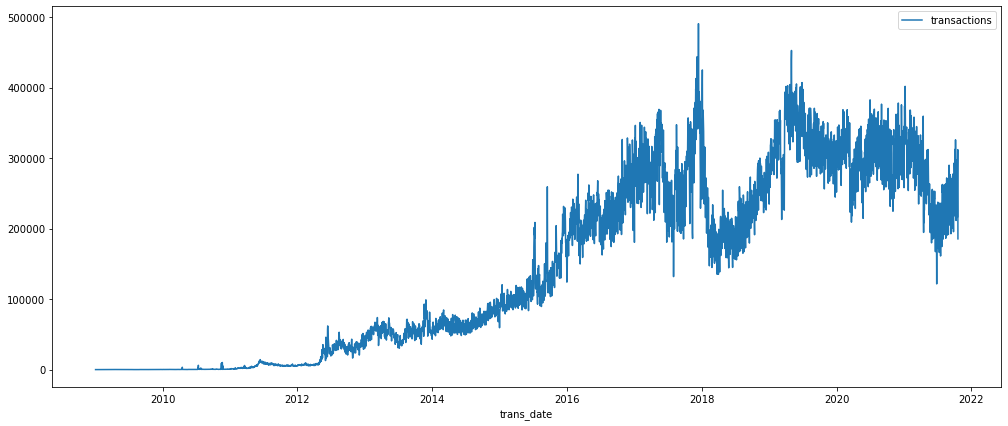

In [67]:
# Plot the raw results to show us the number of Bitcoin transactions per day over the whole timespan of this dataset. 
# First, set the index to be trans_date because for time-series, index needs to be datetime.

transactions_by_date.set_index('trans_date').plot(figsize = (17,7));

As you can see, common table expressions (CTEs) let you shift a lot of your data cleaning into SQL. That's an especially good thing in the case of BigQuery, because it is vastly faster than doing the work in Pandas.

***

### Joins

Examples of a ***join***:

In [68]:
# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "github_repos" dataset
dataset_ref = client.dataset("github_repos", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "licenses" table
licenses_ref = dataset_ref.table("licenses")

# API request - fetch the table
licenses_table = client.get_table(licenses_ref)

# Preview the first five lines of the "licenses" table
client.list_rows(licenses_table, max_results=5).to_dataframe()

,repo_name,license
0,em-gazelle/EfficientJobApps,artistic-2.0
1,duoshaochangke/theSourcesOfFrontEnd.github.io,artistic-2.0
2,webdocc/files,artistic-2.0
3,akshaykodali/scripts,artistic-2.0
4,Abraham1123/Abraham,artistic-2.0


In [69]:
# Construct a reference to the "sample_files" table
files_ref = dataset_ref.table("sample_files")

# API request - fetch the table
files_table = client.get_table(files_ref)

# Preview the first five lines of the "sample_files" table
client.list_rows(files_table, max_results=5).to_dataframe()

,repo_name,ref,path,mode,id,symlink_target
0,git/git,refs/heads/master,RelNotes,40960,62615ffa4e97803da96aefbc798ab50f949a8db7,Documentation/RelNotes/2.10.0.txt
1,np/ling,refs/heads/master,tests/success/plug_compose.t/plug_compose.ll,40960,0c1605e4b447158085656487dc477f7670c4bac1,../../../fixtures/all/plug_compose.ll
2,np/ling,refs/heads/master,fixtures/strict-par-success/parallel_assoc_lef...,40960,b59bff84ec03d12fabd3b51a27ed7e39a180097e,../all/parallel_assoc_left.ll
3,np/ling,refs/heads/master,fixtures/sequence/parallel_assoc_2tensor2_left.ll,40960,f29523e3fb65702d99478e429eac6f801f32152b,../all/parallel_assoc_2tensor2_left.ll
4,np/ling,refs/heads/master,fixtures/success/my_dual.ll,40960,38a3af095088f90dfc956cb990e893909c3ab286,../all/my_dual.ll


Write a query that uses information in both tables to determine how many files are released in each license.

In [70]:
# Query to determine the number of files per license, sorted by number of files

query = """
        SELECT L.license, COUNT(1) as number_of_files
        FROM `bigquery-public-data.github_repos.sample_files` AS sf
        INNER JOIN `bigquery-public-data.github_repos.licenses` AS L 
            ON sf.repo_name = L.repo_name
        GROUP BY L.license
        ORDER BY number_of_files DESC
        """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
file_count_by_license = query_job.to_dataframe()

Breaking down the query above: 

> INNER JOIN `bigquery-public-data.github_repos.licenses` AS L 
            ON sf.repo_name = L.repo_name
            
1. The ***JOIN*** specifies the sources of data and what kind of join we're using (INNER JOIN). We are also using ***ON*** to specify that we combine the tables by matching the values in the `repo_name` columns in the table.

> GROUP BY L.license

2. ***GROUP BY*** breakds the data into a different group for each license before we ***COUNT*** the number of rows in `sample_files` table. 

> ORDER BY number_of_files DESC

3. ***ORDER BY*** sorts the results so that licenses with more files appear first. 

In [71]:
# Print the DataFrame
file_count_by_license

,license,number_of_files
0,mit,20418035
1,gpl-2.0,16792944
2,apache-2.0,7106098
3,gpl-3.0,4902118
4,bsd-3-clause,2929339
5,agpl-3.0,1292022
6,lgpl-2.1,792881
7,bsd-2-clause,694532
8,lgpl-3.0,563605
9,mpl-2.0,472843
